## Explanation of the Code ##
### Import Libraries: ###
We use numpy for numerical operations, matplotlib for plotting, and tensorflow.keras to load the Fashion MNIST dataset.
### KArmedBandit Class: ###
This class encapsulates the k-armed bandit algorithm, including methods for action selection, updating estimates, and simulating user interactions.
### Loading the Dataset: ###
We load the Fashion MNIST dataset using Keras. The images are flattened and normalized.
### Running the Experiment: ###
We create a random array for the true action values (this simulates the unknown user preference). We run the k-armed bandit simulation for a specified number of steps and an exploration rate (epsilon).
### Plotting Results: ###
We visualize the cumulative rewards over time to assess the performance of our recommendation strategy.
-This will simulate a k-armed bandit recommendation system based on the Fashion MNIST dataset, displaying the cumulative rewards over time and the estimated action values for each clothing item.
### Notes ###
1) In this implementation, the reward mechanism is randomly generated, which simulates user preferences. You can enhance the reward mechanism by integrating actual user feedback or historical interaction data.
2) The true action values are randomly initialized for demonstration purposes. In a real-world scenario, you might want to calculate these based on user interactions or historical data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
class KArmedBandit:
    def __init__(self, k, true_action_values):
        self.k = k  # Number of arms (items)
        self.true_action_values = true_action_values  # True values of the arms
        self.n = np.zeros(k)  # Number of times each arm is pulled
        self.q_estimates = np.zeros(k)  # Estimated values for each arm

    def select_action(self, epsilon):
        if np.random.rand() < epsilon:  # Exploration
            return np.random.randint(self.k)  # Randomly select an arm
        else:  # Exploitation
            return np.argmax(self.q_estimates)  # Select the best-known arm

    def update_estimates(self, action, reward):
        self.n[action] += 1
        # Update the estimated value using incremental formula
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.n[action]
    #This is the reward model
    def simulate(self, num_steps, epsilon):
        rewards = np.zeros(num_steps)  # Store rewards received at each step
        for step in range(num_steps):
            action = self.select_action(epsilon)
            # Simulate reward: randomly generated or based on true action value
            reward = np.random.randn() + self.true_action_values[action]
            self.update_estimates(action, reward)
            rewards[step] = reward
        return rewards

In [3]:

def run_experiment(k, num_steps, epsilon):
    true_action_values = np.random.rand(k)  # Random true action values for each item
    bandit = KArmedBandit(k, true_action_values)
    rewards = bandit.simulate(num_steps, epsilon)
    cumulative_rewards = np.cumsum(rewards)
    return bandit.q_estimates, cumulative_rewards

In [4]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# Flatten images and normalize
x_train = x_train.reshape(-1, 28 * 28) / 255.0  # Flatten images
k = 10  # Number of different clothing items (classes in Fashion MNIST)

In [6]:
# For this example, we will use random true action values
num_steps = 1000  # Number of steps to simulate
epsilon = 0.1  # Exploration rate

In [7]:
# Run the experiment
q_estimates, cumulative_rewards = run_experiment(k, num_steps, epsilon)

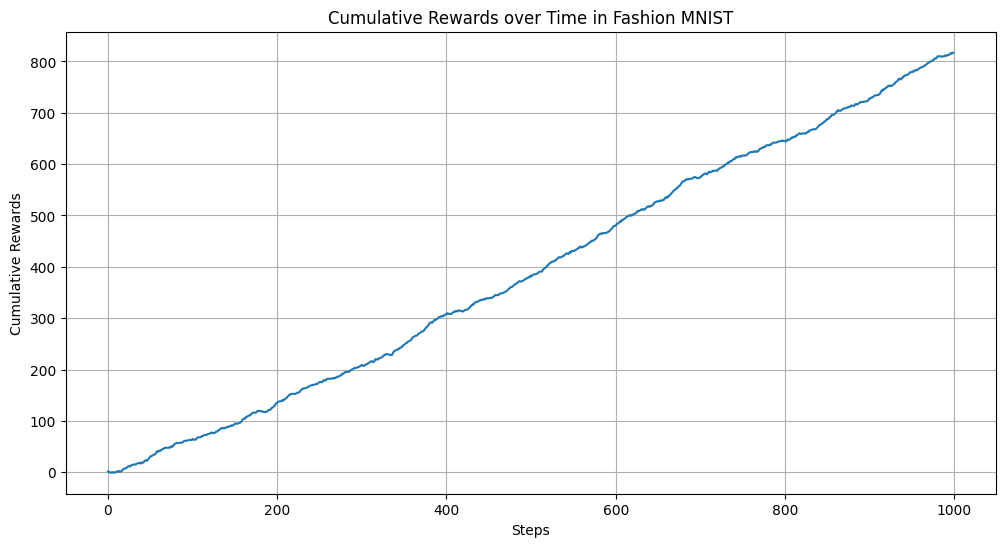

In [8]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards)
plt.title("Cumulative Rewards over Time in Fashion MNIST")
plt.xlabel("Steps")
plt.ylabel("Cumulative Rewards")
plt.grid()
plt.show()

In [9]:
print("Estimated Action Values: ", q_estimates)

Estimated Action Values:  [0.47473097 0.37942647 0.48472488 0.70313682 0.24836397 0.51032554
 0.75226659 0.88916325 0.37348343 0.76122916]
